In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph

# Deal with Curse of Dimensionality

- Data Viz
- Manifold: Most real world high-dimensional datasets lie close to a lower-dimensional manifold

# PCA
- Identifies axis that accounts for largest amount of variance
- data is centered first usually (by scikitlearn does this automatically)

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.84248607 0.14631839]


In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [7]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


In [9]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

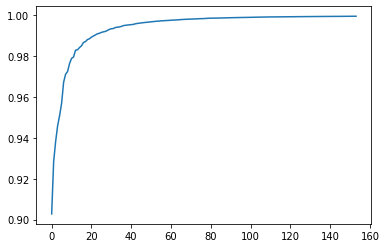

In [10]:
graph.plot(1- pca.explained_variance_ratio_)

In [11]:
pca = PCA(n_components=154)

X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

#### Randomized PCA
- Find approximation of first d components; stochastic, fast

In [18]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

#### Incremental PCA
- Load data in mini batches

In [19]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

### Kernel PCA
- Map instances into a very high-dimensional space : Feature Space
    - Allow nonlinear classification

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components = 2)), 
    ('log_reg'), LogisticRegression()])

param_grid = [{'kpca__gamma': np.linspace(0.03, 0.05, 10), 
               'kpca__kernel': ['rbf', 'sigmoid']}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

print(grid_search.best_params_)

###### Perform Reconstruction

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

# LLE
- Does not rely on projections like previous algorithms
- 1st: Measure how each training instance linearly related to closest neighbour
- 2nd: Look for low-dimensional representation of training set where these local relationships are best preserved

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

# Other dimensionality reduction Techniques

- Multidimensional scaling (MDS): Reduce dimensionality WHILE trying to preserve distances between instances
- Isomap: Create graph connecting each instance to nearest neighbour, then reduce dimensionality while trying to preserve geodesic distances
- t-SNE: Try to keep similar instances close and dissimilar instances apart
    - Mostly used for visualisation
- Linear Discriminant Analysis (LDA): Classification algorithm, learn most discriminatuve axes between classes


# Exercises

9. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). 
- Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. 
- Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new Random Forest classifier on the reduced dataset and see how long it
takes. 
- Was training much faster? Next evaluate the classifier on the test set: how
does it compare to the previous classifier?

10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. 
- You can use a scatterplot using 10 different colors to represent
each image’s target class. Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance). You should get a nice visualization
with well-separated clusters of digits. 
- Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.